In [1]:
import p3Basis_Functions_2D as bf
import p3Gauss_Quadrature_2D as gq
import p3Boundary_Conditions as bc
import p3Diffusion_2D as d2
import p3Surface_Mesh as sm

# Project 3: Two-dimensional finite element analysis code for diffusion/steady-state heat conduction

### Problem data
- Boundary conditions:
    - Bottom: Dirichlet, g=10
    - Top: Neumann, flux h=0.3
    - Left, right: Neumann, h=0 (i.e. insulated or periodic)
- f=0 (no internal heat generation)

### Tasks
Describe what happens (using text and contour plots) when the thermal conductivity of the **mortar** (at the two "holes" in the mesh) is:
- significantly **lower** than that of the clay for the brick
    - For this case the heat can be seen to transfer more quickly through the brick than the mortar. This is reflected in the way the temperature contour lines "bunch up" around the mortar areas, as opposed to the more relaxed, smoothed-out temperature differences in the brick portions
- approximately **equal** to that of the brick
    - Here we see, as expected, that heat transfers through the brick and mortar at the same rate, so the contour lines' spacing in mortar areas are no different than those in brick areas
- much **greater** than that of the brick
    - Lastly, here the contour lines show that the temperature differences are more compact in the brick area than in the mortar "holes", where differences are more spaced out because heat has flowed more readily there.

In [2]:
################### PROBLEM SETUP CODE ###################
def BrickKappa_BrickTC_Larger(x, y):
    # mortarkappa = 3.3
    mortarkappa = 0.00001 # 100000x smaller
    claykappa = 1.0
    if (x-15)**2 + (y-5)**2 <= 2:
        return mortarkappa
    elif (x-5)**2 + (y-5)**2 <= 2:
        return mortarkappa
    else:
        return claykappa

def BrickKappa_EqualTC(x, y):
    mortarkappa = 1.0 # equal 
    claykappa = 1.0
    if (x-15)**2 + (y-5)**2 <= 2:
        return mortarkappa
    elif (x-5)**2 + (y-5)**2 <= 2:
        return mortarkappa
    else:
        return claykappa

def BrickKappa_MortarTC_XLarger(x, y):
    mortarkappa = 100000 # 10000x larger
    claykappa = 1.0
    if (x-15)**2 + (y-5)**2 <= 2:
        return mortarkappa
    elif (x-5)**2 + (y-5)**2 <= 2:
        return mortarkappa
    else:
        return claykappa

class run_problem():
    def __init__(self, n_quad, kappa_in):
        self.n_quad = n_quad
        self.temp = 10
        self.f = lambda x: 0
        self.quadrature = gq.Gauss_Quadrature2d(self.n_quad,-1,1)
        self.kappa = kappa_in
        self.make_mesh()
        self.ien = d2.CreateIENArray(self.mesh)
        self.make_bcs()
    def make_mesh(self):
        self.mesh = sm.SurfaceMesh.FromOBJ_FileName("files/brick.obj")
        [self.left,self.bottom,self.right,self.top]=d2.ProcessIntoSideSets(self.mesh)
    def make_bcs(self):
        self.left_bc = bc.BoundaryCondition(0, self.left)
        self.right_bc = bc.BoundaryCondition(2, self.right)
        self.down_bc = bc.BoundaryCondition(1, self.bottom)
        self.top_bc = bc.BoundaryCondition(3, self.top)
        self.left_bc.InitializeData(bc.BCType.Neumann, 0, 0, 1)
        self.right_bc.InitializeData(bc.BCType.Neumann, 0, 0, 1)
        self.down_bc.InitializeData(bc.BCType.Dirichlet, self.temp, 1, 0)
        self.top_bc.InitializeData(bc.BCType.Neumann, 0.3, 0, 1)
        self.boundaries = [self.left_bc,self.right_bc,self.down_bc,self.top_bc]

    def solve(self):
        self.prob = d2.FEM_Diffusion2d(self.mesh,self.boundaries,self.f,self.quadrature,self.kappa)
        self.D = self.prob.D
        self.DTotal = d2.ConcatenateToFullD(self.mesh,self.boundaries,self.D)

    def plot(self):
        d2.PlotTriangulationSolution(self.mesh,self.DTotal)

## Mortar < brick

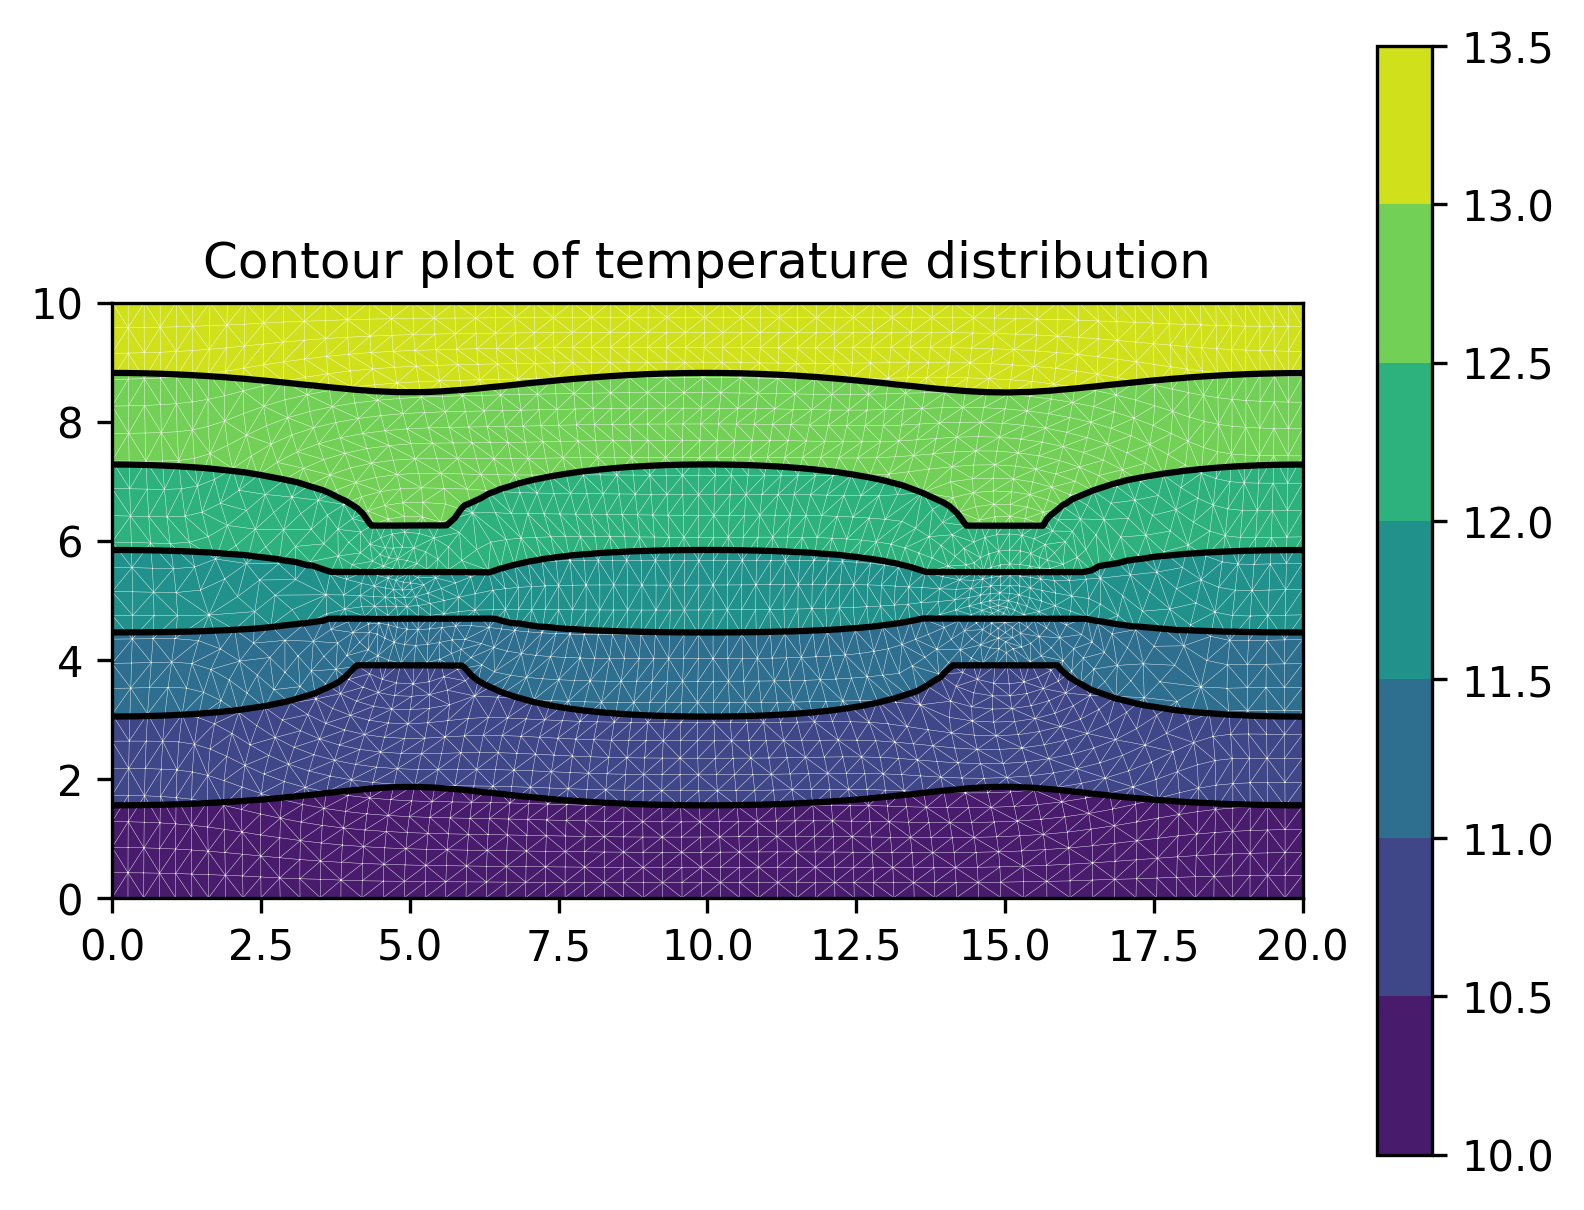

In [3]:
prob1 = run_problem(3, BrickKappa_BrickTC_Larger)
prob1.solve()
prob1.plot()

## Mortar ~= brick

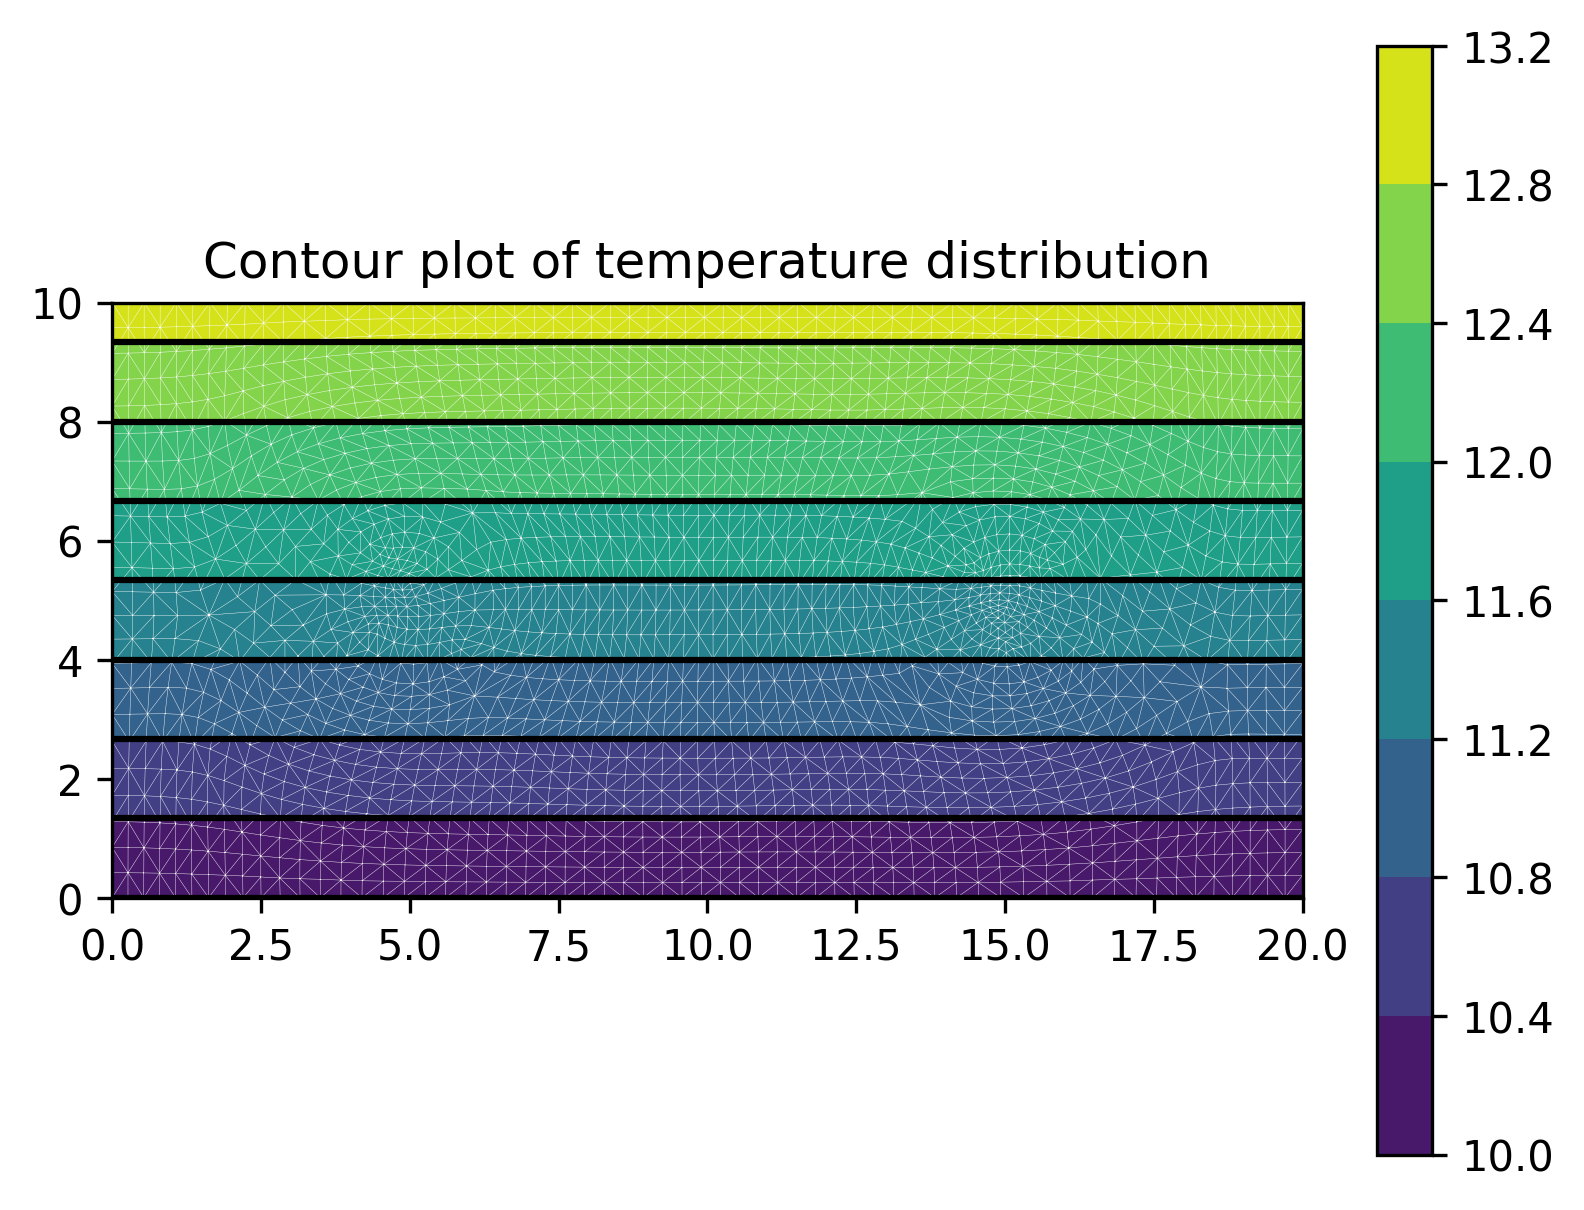

In [4]:
prob2 = run_problem(3, BrickKappa_EqualTC)
prob2.solve()
prob2.plot()

## Mortar >> brick

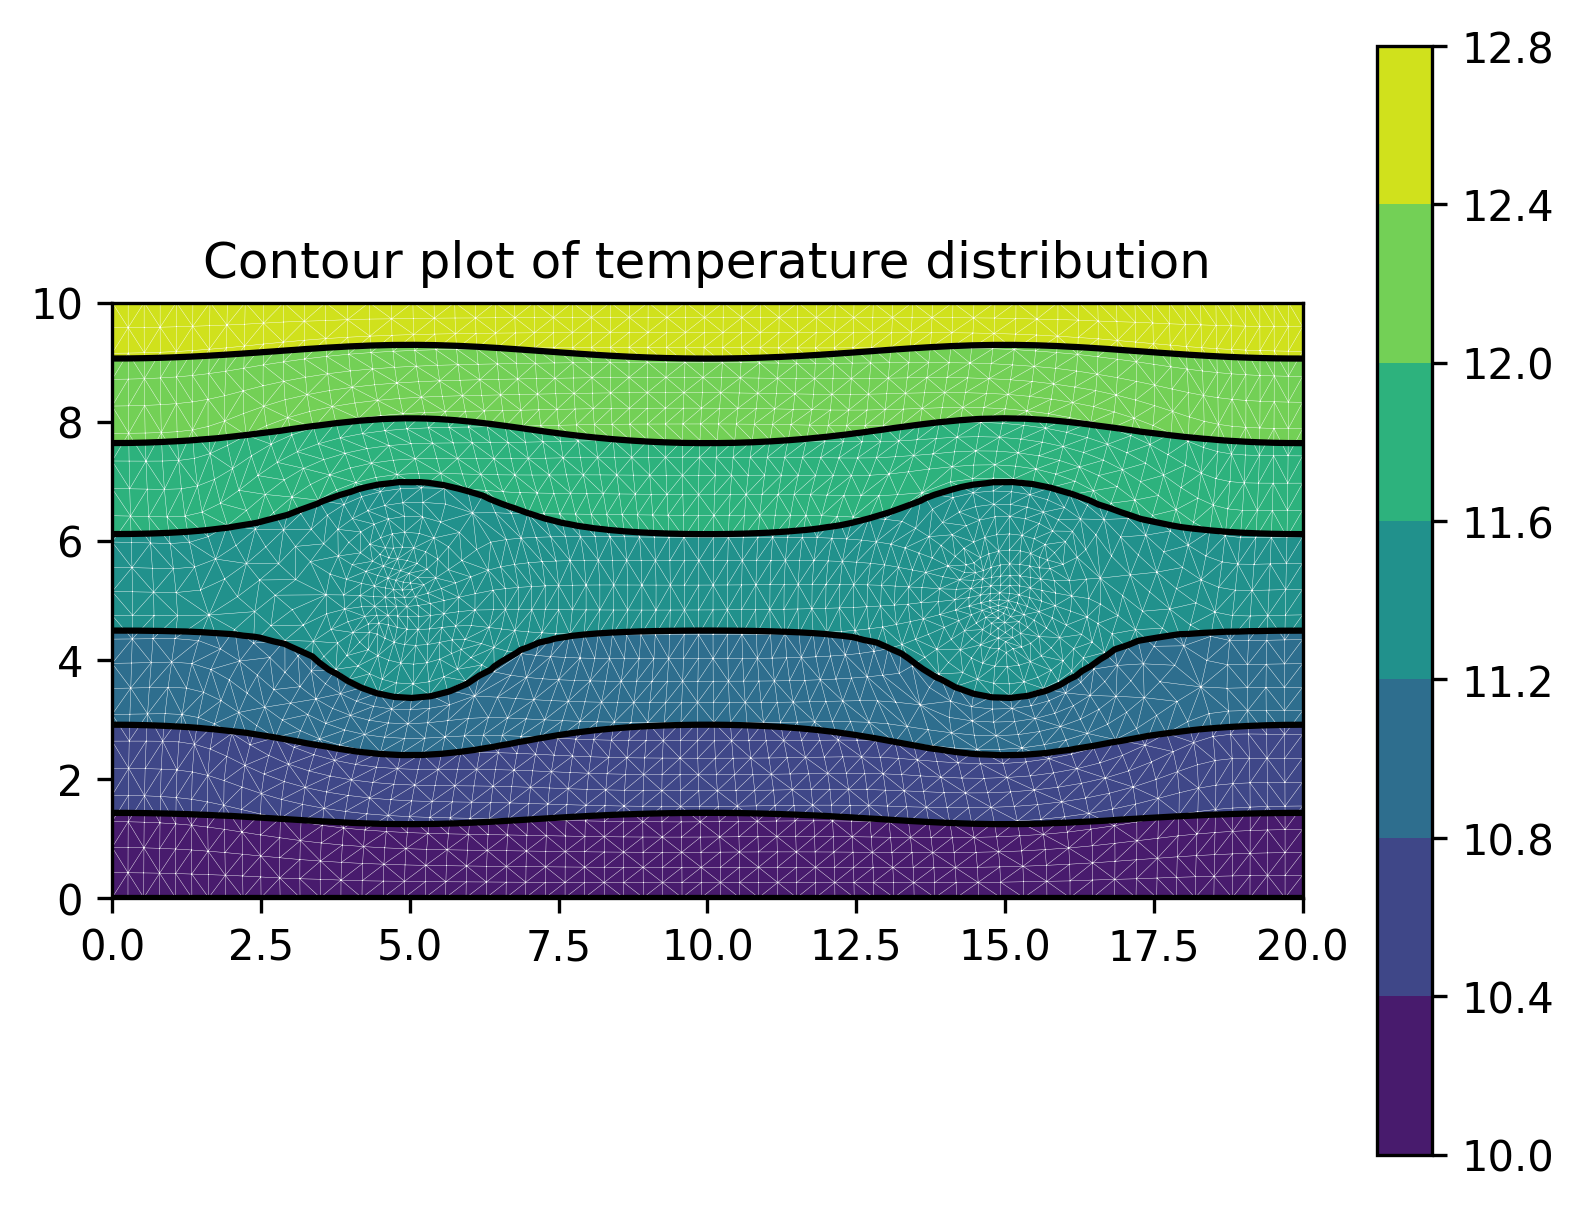

In [5]:
prob3 = run_problem(3, BrickKappa_MortarTC_XLarger)
prob3.solve()
prob3.plot()